# Medidas de dispersión

### Varianza = $$ \frac{1}{n} \sum_{i=1}^n (x_i - \mu)^2 = \sigma^2 $$ en donde $\mu$ es la media (promedio)

### Desviación estándar = $$ \sqrt{\frac{1}{n} \sum_{i=1}^n (x_i - \mu)^2} = \sigma $$

##### Existen un caso particular de la desviación estándar, cuando se calcula para una muestra. En este caso hay una pequeña variación en la fórmula:

### $$ \sigma_{sample} = \sqrt{\frac{1}{n - 1} \sum_{i=1}^n (x_i - \mu)^2}$$

In [2]:
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import os

# Verify if the code is run as an script or in an interactive environment
# Get the current directory

if '__file__' in globals():
    current_dir = os.path.dirname(__file__)
else:
    current_dir = os.getcwd()

csv_path = os.path.join(current_dir, "datasets", "cars.csv")

csv_path

df = pd.read_csv(csv_path)

df.head()

,manufacturer_name,model_name,transmission,color,odometer_value,year_produced,engine_fuel,engine_has_gas,engine_type,engine_capacity,...,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,duration_listed
0,Subaru,Outback,automatic,silver,190000,2010,gasoline,False,gasoline,2.5,...,True,True,True,False,True,False,True,True,True,16
1,Subaru,Outback,automatic,blue,290000,2002,gasoline,False,gasoline,3.0,...,True,False,False,True,True,False,False,False,True,83
2,Subaru,Forester,automatic,red,402000,2001,gasoline,False,gasoline,2.5,...,True,False,False,False,False,False,False,True,True,151
3,Subaru,Impreza,mechanical,blue,10000,1999,gasoline,False,gasoline,3.0,...,False,False,False,False,False,False,False,False,False,86
4,Subaru,Legacy,automatic,black,280000,2001,gasoline,False,gasoline,2.5,...,True,False,True,True,False,False,False,False,True,7


In [3]:
df['price_usd'].std()

6428.1520182029035

In [4]:
# Rango = valor max - valor min
rango = df['price_usd'].max() - df['price_usd'].min()
rango

49999.0

In [5]:
# Cuartiles
median = df['price_usd'].median()
Q1 = df['price_usd'].quantile(q=0.25)
Q3 = df['price_usd'].quantile(q=0.75)
min_val = df['price_usd'].quantile(q=0)
max_val = df['price_usd'].quantile(q=1)
print(min_val, Q1, median, Q3, max_val)

1.0 2100.0 4800.0 8990.0 50000.0


In [6]:
# Rango intercuartil

iqr = Q3 - Q1
iqr

6890.0

## Límites para detección de outliers (datos simétricamente distribuidos)

Datos entre Q1 - 1.5 x IQR y Q3 + 1.5 x IQR

In [7]:
minlimit = Q1 - 1.5*iqr
maxlimit = Q3 + 1.5*iqr
print(minlimit, maxlimit)

-8235.0 19325.0


En este caso en particular no tiene sentido que los ouliers tengan números negativos ya que estamos hablando de precios, esto indica que esta distribución no es simétrica 

<Axes: xlabel='price_usd', ylabel='Count'>

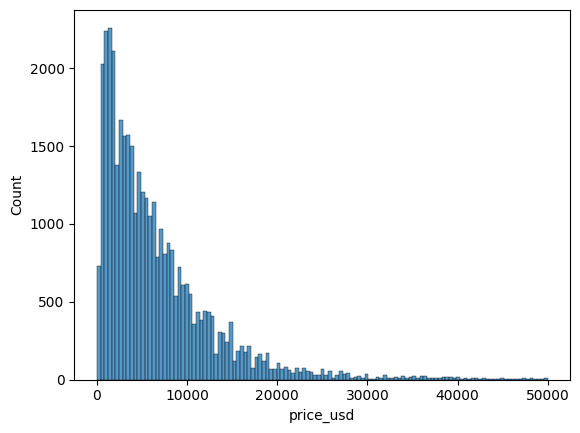

In [8]:
sns.histplot(df['price_usd'])

<Axes: >

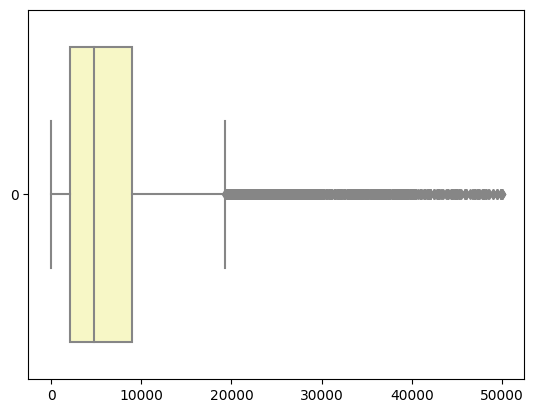

In [16]:
sns.boxplot(df['price_usd'], orient='h', palette='Spectral')

<Axes: xlabel='engine_fuel', ylabel='price_usd'>

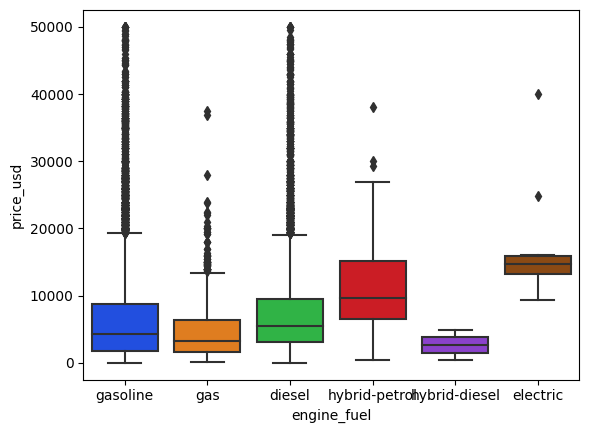

In [18]:
sns.boxplot(x = 'engine_fuel', y='price_usd', data=df, palette='bright')